<a href="https://colab.research.google.com/github/SDRIYAZ/machine-learning/blob/main/A_Z_(ML)_udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing Tools

###1.importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


###2.importing the dataset

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/ML(A-Z) Udemy/Part 1 - Data Preprocessing/Section 2 -------------------- Part 1 - Data Preprocessing --------------------/Python/Data.csv")


In [ ]:
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [ ]:
data.Country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:

x=data.iloc[:, :-1].values
y=data.iloc[:,-1].values

In [ ]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [ ]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [ ]:
data.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [ ]:
data.isnull().mean()

Country      0.0
Age          0.1
Salary       0.1
Purchased    0.0
dtype: float64

###3.Taking care of  missing data

In [ ]:
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(x[:, 1:3])
x[:, 1:3]=imputer.transform(x[:, 1:3])

In [ ]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


####Encoding Categorical Data

Encoding the Independent Variable

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0],)],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [ ]:
print(x)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


####Encoding the Dependent Variable 
-    Label Encoder

In [ ]:
from sklearn.preprocessing import  LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [ ]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


###4.Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=1)

In [ ]:
print(x_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [ ]:
print(x_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [ ]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [ ]:
print(y_test)

[0 1]


###5.Feature Scaling

-   We have to perform Feature Scaling after  splitting the dataset int train and test datasets

-   Feature Scaling is  only Applicable for the numerical values

-   We don't want to apply feature scaling to the Dummy variables



-   Standardization   helps you to scale down your feature between between -n and +n
-   Normalisation helps you to scale down your feature between 0 and 1

In [ ]:
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train[:,3:]=sc.fit_transform(x_train[: ,3:])
x_test[:,3:]=sc.transform(x_test[:,3:])


In [ ]:
print(x_train)

[[0.0 0.0 1.0 -0.17880800499006266 -0.9423558815909454]
 [0.0 1.0 0.0 -0.015957660100061968 -0.09473352892964938]
 [1.0 0.0 0.0 0.5650655912809306 0.6253046724236136]
 [0.0 0.0 1.0 -0.3064692857905582 -0.3379896780354819]
 [0.0 0.0 1.0 -1.9042832270882881 -1.4764284558507763]
 [1.0 0.0 0.0 1.1460888426619231 1.2383101681703106]
 [0.0 1.0 0.0 1.4366004683524196 1.5885990228827092]
 [1.0 0.0 0.0 -0.7422367243263028 -0.6007063190697806]]


In [ ]:
print(x_test)

[[0.0 1.0 0.0 -1.5382866113506009 -0.7713692733703171]
 [1.0 0.0 0.0 -0.4517250986358064 0.1874436040331157]]


#Regression

###1.Simple Linear Regression
-  y=b0+b1x1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ML(A-Z) Udemy/Part 2 - Regression/Section 4 - Simple Linear Regression/Python/Salary_Data.csv")

x=df.iloc[:, :-1].values
y=df.iloc[:,-1].values

In [ ]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

Training the Simple Linear Regression model  on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Predicting  the Test set results
y_predict=regressor.predict(x_test)

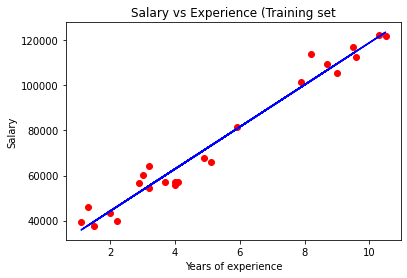

In [ ]:
#visualising the training set
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Salary vs Experience (Training set')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

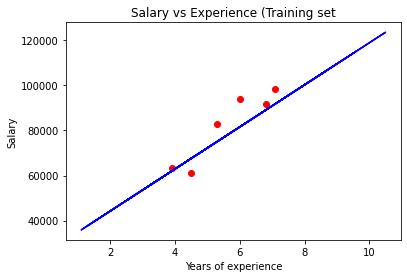

In [ ]:
#visualising the test set
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Salary vs Experience (Training set')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

Assumptions of a linear Regression
-   1.Linearity
-   2.Homoscedasticity
-   3.Multivariaye normality
-   4.Independence of errors
-   5.Lack of multicollinearity

###2.Multiple Linear Regression
-   y=b0+b1x1+b2x2+...bnxn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
ds=pd.read_csv("/content/drive/MyDrive/ML(A-Z) Udemy/Part 2 - Regression/Section 5 - Multiple Linear Regression/Python/50_Startups.csv")
ds.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
ds.shape

(50, 5)

In [ ]:
ds.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
ds.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
x=ds.iloc[:,:-1].values
y=ds.iloc[:,-1].values

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3],)],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [ ]:
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [ ]:
#Training
from sklearn.linear_model import  LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#predicting the test
y_predict=regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_predict.reshape(len(y_predict),1),y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [ ]:
#Evaluating the model performance
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)



0.9347068473282515

###3.Polynomial Regression
-   y=b0+b1x1+b1x1^2+b2x1^3+....bnx1^n

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/ML(A-Z) Udemy/Part 2 - Regression/Section 6 - Polynomial Regression/Python/Position_Salaries.csv")
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [ ]:
#Training Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Training Polynomial Linear Regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x)
lin_reg_2=LinearRegression()
lin_reg_2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

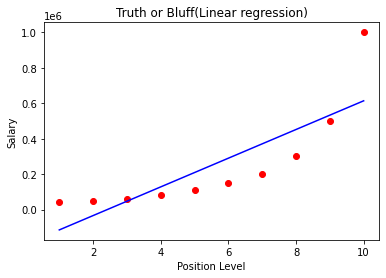

In [ ]:
#Visualising Linear regression
plt.scatter(x,y,color='red')
plt.plot(x,lin_reg.predict(x),color='blue')
plt.title('Truth or Bluff(Linear regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

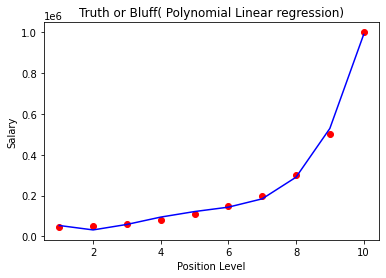

In [ ]:
#Visualising Polynomial Linear Regression
plt.scatter(x,y,color='red')
plt.plot(x,lin_reg_2.predict(x_poly),color='blue')
plt.title('Truth or Bluff( Polynomial Linear regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
#Predicting a new result with Linear regression
lin_reg.predict([[6.5]])

array([330378.79])

In [ ]:
#Predicting a mew result with Polynomial Linear Regression
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45])

In [ ]:
#Evaluating the model
from sklearn.metrics import r2_score
r2_score(,lin_reg_2)

###4.Support Vector Regression(SVR)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ML(A-Z) Udemy/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/Python/Position_Salaries.csv")
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [ ]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [ ]:
y=y.reshape(len(y),1)

In [ ]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x)  #When we fit the data both mean and standard deviation  of the salaries is fitted
y=sc_y.fit_transform(y)


In [ ]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [ ]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [ ]:
#Training SVR Model on whole dataset
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(x,y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
#predicting a new reslut
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

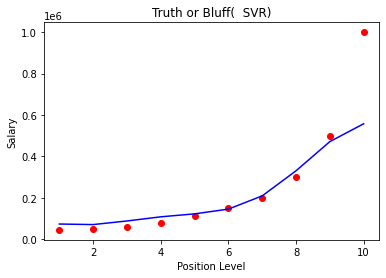

In [ ]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x)),color='blue')
plt.title('Truth or Bluff(  SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

###5.Decision Tree Regression
-   we don't need to apply the feature scalling for decision tree Regression and Random Forest Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/ML(A-Z) Udemy/Part 2 - Regression/Section 8 - Decision Tree Regression/Python/Position_Salaries.csv")
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values

In [ ]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [ ]:
#Training  on whole dataset
from sklearn.tree import DecisionTreeRegressor
dec_reg=DecisionTreeRegressor(random_state=0)
dec_reg.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
#prediction
dec_reg.predict([[6.5]])

array([150000.])

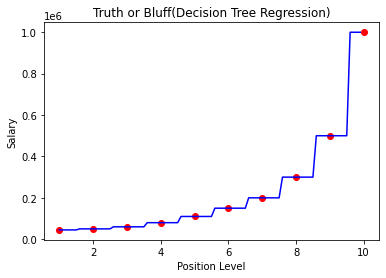

In [ ]:
x_grid=np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(x,y,color='red')
plt.plot(x_grid,dec_reg.predict(x_grid),color='blue')
plt.title('Truth or Bluff(Decision Tree Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

###6.Random Forest Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
dt=pd.read_csv("/content/drive/MyDrive/ML(A-Z) Udemy/Part 2 - Regression/Section 9 - Random Forest Regression/Python/Position_Salaries.csv")
x=dt.iloc[:,1:-1].values
y=dt.iloc[:,-1].values

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rand_reg=RandomForestRegressor(n_estimators=10,random_state=0)
rand_reg.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
rand_reg.predict([[6.5]])

array([167000.])

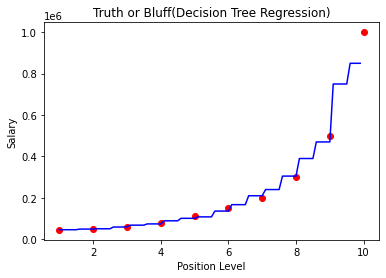

In [ ]:
x_grid=np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(x,y,color='red')
plt.plot(x_grid,rand_reg.predict(x_grid),color='blue')
plt.title('Truth or Bluff(Decision Tree Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()